In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/User 1/Desktop/Ai_Ml_QB/pandas/17_06_18_06/car-sales-extended-missing-data.csv')
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [3]:
print(df.info())
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB
None


In [4]:
df.rename(columns={'Odometer (KM)': 'Odometer'}, inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [5]:
print(pd.isnull(df.Make).sum())
print(pd.isnull(df.Colour).sum())
print(pd.isnull(df.Odometer).sum())
print(pd.isnull(df.Doors).sum())
print(pd.isnull(df.Price).sum())

49
50
50
50
50


In [6]:
print(pd.notnull(df["Make"]).sum())
print(pd.notnull(df["Colour"]).sum())
print(pd.notnull(df["Odometer"]).sum())
print(pd.notnull(df["Doors"]).sum())
print(pd.notnull(df["Price"]).sum())

951
950
950
950
950


In [7]:
# len(df)
df.shape[0]

1000

Filling Missing Values in Pandas

In [8]:
#Using fillna()

# df.fillna(0, inplace=True)
# df.fillna(method='ffill') #df.ffill()
# df.fillna(method='bfill') #df.bdill()
df.fillna('whyyyyyyy', limit=2,inplace=True) 
# print(df.to_string())

C:\Users\User 1\AppData\Local\Temp\ipykernel_6828\3758177545.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whyyyyyyy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('whyyyyyyy', limit=2,inplace=True)


In [9]:
#using replace()

# df.replace(to_replace=np.nan, value=df["Price"].mean(), inplace=True)
# print(df.to_string())

interpolate() method in pandas is used to fill in missing values (NaN) using interpolation—which means estimating values based on other data in the same column.

By default, it uses linear interpolation along the index (meaning, it assumes values change in a straight line between known points), but you can customize how it works.

In [10]:
# using interpolate()
import pandas as pd
import numpy as np

# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 10, np.nan, 40, 50]
})

print("Original DataFrame:")
print(df)

# 1. Linear interpolation (default)
linear_interp = df.interpolate()
print("\nLinear Interpolation:")
print(linear_interp)

# 2. Polynomial interpolation (order 2)
poly_interp = df.interpolate(method='polynomial', order=2)
print("\nPolynomial Interpolation (order=2):")
print(poly_interp)

# 3. Spline interpolation (order 2)
spline_interp = df.interpolate(method='spline', order=2)
print("\nSpline Interpolation (order=2):")
print(spline_interp)

# 4. Limit direction: forward
forward_limit = df.interpolate(limit_direction='forward')
print("\nForward Fill Interpolation:")
print(forward_limit)

# 5. Limit direction: backward
backward_limit = df.interpolate(limit_direction='backward')
print("\nBackward Fill Interpolation:")
print(backward_limit)

# 6. Interpolate along rows instead of columns
row_wise = df.interpolate(axis=1)
print("\nRow-wise Interpolation (axis=1):")
print(row_wise)

# 7. Interpolation with limit (only 1 NaN filled consecutively)
limited = df.interpolate(limit=1)
print("\nInterpolation with limit=1:")
print(limited)


Original DataFrame:
     A     B
0  1.0   NaN
1  2.0  10.0
2  NaN   NaN
3  4.0  40.0
4  5.0  50.0

Linear Interpolation:
     A     B
0  1.0   NaN
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0

Polynomial Interpolation (order=2):
     A          B
0  1.0        NaN
1  2.0  10.000000
2  3.0  26.666667
3  4.0  40.000000
4  5.0  50.000000

Spline Interpolation (order=2):
     A          B
0  1.0        NaN
1  2.0  10.000000
2  3.0  26.666667
3  4.0  40.000000
4  5.0  50.000000

Forward Fill Interpolation:
     A     B
0  1.0   NaN
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0

Backward Fill Interpolation:
     A     B
0  1.0  10.0
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0

Row-wise Interpolation (axis=1):
     A     B
0  1.0   1.0
1  2.0  10.0
2  NaN   NaN
3  4.0  40.0
4  5.0  50.0

Interpolation with limit=1:
     A     B
0  1.0   NaN
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'x': range(7),
    'y': [2, np.nan, np.nan, 8, np.nan, 18, 20]
})

print("Original DataFrame:")
print(df)

# Apply polynomial interpolation of order 2
df_poly = df.copy()
df_poly['y'] = df_poly['y'].interpolate(method='polynomial', order=2)

print("\nPolynomial Interpolation (order=2):")
print(df_poly)

# Optional plot
plt.plot(df['x'], df['y'], 'o-', alpha = 0.9,label='Original with NaNs')
plt.plot(df_poly['x'], df_poly['y'], 's--', alpha=0.3,label='Polynomial Interpolated')
plt.legend()
plt.title("Polynomial Interpolation")
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

### Dropping Missing Values in Pandas

Dropping Rows with All Null Values

In [ ]:
dict = {'First Score': [100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score': [52, np.nan, 80, 98],
        'Fourth Score': [np.nan, np.nan, np.nan, 65]}
df = pd.DataFrame(dict)
display(df)
df.dropna(how='all')

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


In [ ]:
df.loc[3, "Fourth Score"] = np.nan

In [ ]:
df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,NaN


In [ ]:
df = df.dropna(how='all', axis=1)
df

,First Score,Second Score,Third Score
0,100.0,30.0,52.0
1,NaN,NaN,NaN
2,NaN,45.0,80.0
3,95.0,56.0,98.0


In [ ]:
df1 = df.dropna()
display(df1)

,First Score,Second Score,Third Score
0,100.0,30.0,52.0
3,95.0,56.0,98.0


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [100, np.nan, np.nan, 95],
    'B': [30, np.nan, 45, 56],
    'C': [52, np.nan, 80, 98],
    'D': [np.nan, np.nan, np.nan, 65]
})
print("Original:\n", df)

print("\nDrop rows with at least 1 NaN:\n",df.dropna())

print("\nDrop rows where all values are NaN:\n",df.dropna(how='all'))

print("\nDrop columns with at least 1 NaN:\n",df.dropna(axis=1))

Original:
        A     B     C     D
0  100.0  30.0  52.0   NaN
1    NaN   NaN   NaN   NaN
2    NaN  45.0  80.0   NaN
3   95.0  56.0  98.0  65.0

Drop rows with at least 1 NaN:
       A     B     C     D
3  95.0  56.0  98.0  65.0

Drop rows where all values are NaN:
        A     B     C     D
0  100.0  30.0  52.0   NaN
2    NaN  45.0  80.0   NaN
3   95.0  56.0  98.0  65.0

Drop columns with at least 1 NaN:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Customer': ['Alice', 'Bob', 'Charlie', 'David'],
    'Email': ['alice@example.com', np.nan, 'charlie@example.com', np.nan],
    'Phone': [np.nan, '555-1234', '555-9876', np.nan]
})

print("Original DataFrame:")
print(df)

mask = df[['Email', 'Phone']].isna().all(axis=1)

print("\nCustomers with no contact info:")
print(df[mask])

df.loc[df['Email'].isna(), 'Email'] = 'missing@example.com'

print("\nUpdated DataFrame with missing emails filled:")
print(df)


Original DataFrame:
  Customer                Email     Phone
0    Alice    alice@example.com       NaN
1      Bob                  NaN  555-1234
2  Charlie  charlie@example.com  555-9876
3    David                  NaN       NaN

Customers with no contact info:
  Customer Email Phone
3    David   NaN   NaN

Updated DataFrame with missing emails filled:
  Customer                Email     Phone
0    Alice    alice@example.com       NaN
1      Bob  missing@example.com  555-1234
2  Charlie  charlie@example.com  555-9876
3    David  missing@example.com       NaN


query() function enables filtering rows based on logical conditions. Since NaN is not equal to itself (NaN != NaN), we can use expressions like "A == A and B == B" to drop rows containing NaNs.

In [ ]:
df.rename(columns={
    "Customer" : "A",
    'Email':'B',
    'Phone': 'C'
}, inplace=True)
df
print(df.query("A == A and B ==B and C == C"))

         A                    B         C
1      Bob  missing@example.com  555-1234
2  Charlie  charlie@example.com  555-9876


### outliers detections
- Box ploy
- scatter plot
- z -score(threshold typically - 2 or 3)
- interquartie range(IQR)

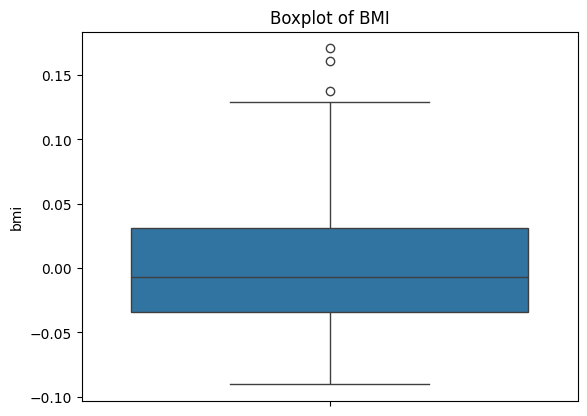

In [15]:
# box plot
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data, columns=column_name)

sns.boxplot(df_diabetics['bmi'])
plt.title('Boxplot of BMI')
plt.show()

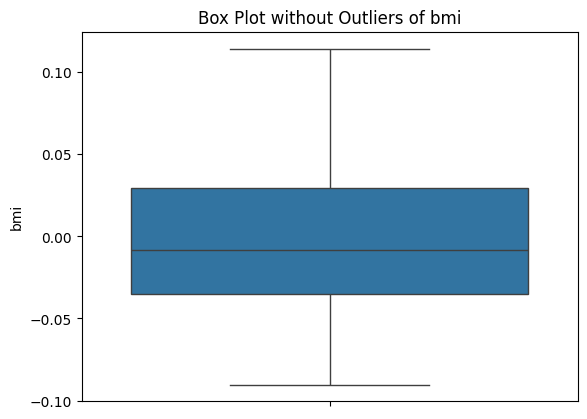

In [16]:
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

Scatter plots help visualize relationships between two variables. It is used when we have paired numerical data and when our dependent variable has multiple values for each reading independent variable. Outliers appear as points far from the main cluster of data.

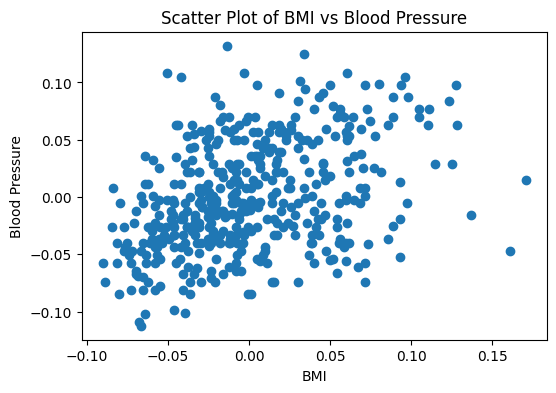

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('BMI')
ax.set_ylabel('Blood Pressure')
plt.title('Scatter Plot of BMI vs Blood Pressure')
plt.show()

we can remove the outliers identified visually from the scatter plot.

- np.where(): Used to find the positions (indices) where the condition is true in the DataFrame.
- (df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8): Checks for outliers where 'bmi' is greater than 0.12 and 'bp' is less than 0.8.

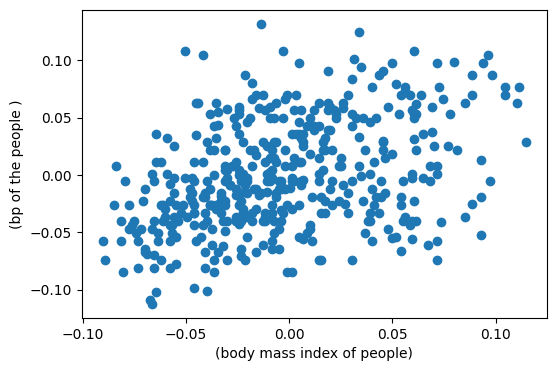

In [26]:
outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()

Z- Score is also called a standard score. This score measures how far a data point is from the mean, in terms of standard deviations. If the Z-score exceeds a given threshold (commonly 3 ot typically 2 or 3) the data point is considered an outlier.

Z-score = x - μ / σ

- x = data point
- μ = mean
- σ = standard deviation

In [19]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

[0.80050009 0.03956713 1.79330681 1.87244107 0.11317236 1.94881082
 0.9560041  1.33508832 0.87686984 1.49059233 2.02518057 0.57139085
 0.34228161 0.11317236 0.95323959 1.1087436  0.11593688 1.48782782
 0.80326461 0.57415536 1.03237385 1.79607132 1.79607132 0.95323959
 1.33785284 1.41422259 2.25428981 0.49778562 1.10597908 1.41145807
 1.26148309 0.49778562 0.72413034 0.6477606  0.34228161 1.02960933
 0.26591186 0.19230663 0.03956713 0.03956713 0.11317236 2.10155031
 1.26148309 0.41865135 0.95323959 0.57139085 1.18511334 1.64333183
 1.41145807 0.87963435 0.72413034 1.25871858 1.1087436  0.19230663
 1.03237385 0.87963435 0.87963435 0.57415536 0.87686984 1.33508832
 1.49059233 0.87963435 0.57415536 0.72689486 1.41145807 0.9560041
 0.19230663 0.87686984 0.80050009 0.34228161 0.03956713 0.03956713
 1.33508832 0.26591186 0.26591186 0.19230663 0.65052511 2.02518057
 0.11317236 2.17792006 1.48782782 0.26591186 0.34504612 0.80326461
 0.03680262 0.95323959 1.49059233 0.95323959 1.1087436  0.95600

 to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between ±3 standard deviation using Gaussian Distribution approach.

 - np.where() : Used to find the positions (indices) in the Z-score array where the condition is true.
- z > threshold : Checks for outliers in the 'age' column where the absolute Z-score exceeds the defined threshold (typically 2 or 3).
- threshold = 2 : A cutoff value used to identify outliers, data points with a Z-score greater than 2 are considered outliers.

In [20]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


 Interquartile Range (IQR) Method
 
IQR (Inter Quartile Range) method is a widely used and reliable technique for detecting outliers. It is robust to skewed data and helps identify extreme values based on quartiles and it most trusted approach used in the research field. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):

IQR=Q3−Q1

Syntax : numpy.percentile(arr, n, axis=None, out=None)

Parameters:

arr: Input array.
n: Percentile value.

In [21]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


To define the outlier base value is defined above and below dataset's normal range namely Upper and Lower bounds define the upper and the lower bound (1.5*IQR value is considered i.e:

upper=Q3+1.5∗IQR

lower=Q1−1.5∗IQR

In the above formula the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [22]:
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


In [23]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)


Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)
